In [1]:
%%time
import numpy as np
import cv2
import doctest
import glob


x = []
masks = []
for m in glob.glob('**/mask*.png', recursive=True):
    masks.append(cv2.imread(m, cv2.IMREAD_GRAYSCALE))
for i in glob.glob('**/image*.png', recursive=True):
    x.append(cv2.imread(i))

alpha = 255
beta = 1
q = np.array([alpha*(1-np.where(m>0, 1, m)) for m in masks])
g = np.zeros((5,5,1000,999))
for i in range(4):
    for j in range(i+1,5):
        x_diff = np.sum(np.abs(x[i]-x[j]), axis=2)
        g[i,j] = beta*(x_diff[:,:-1]+x_diff[:,1:]) 
        g[j,i] = g[i, j]

f = np.zeros((1000, 5, 1000))
for j in range(999):
    f[j+1] = np.min(q[:,:, 999-j]+f[j]+g[:,:,:,998-j], axis=1)


# will store best pic to pick from
k_best = np.zeros((1000,1000)).astype(int)
k_best[0] = np.argmin(q[:,:,0]+f[-1], axis=0)
for i in range(1, 999):
    g_ = np.take_along_axis(g[:,:,:,i-1], k_best[i-1][None,None,:], axis=0)[0]
    val = q[:,:,i]+g_+f[998-i]
    k_best[i]=np.argmin(val, axis=0)

# sum pictures
x = np.array(x)
res = np.take_along_axis(x, k_best.T[None, :,:, None], axis=0)[0]

cv2.imwrite('5.png', res)


Wall time: 1.39 s


True

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

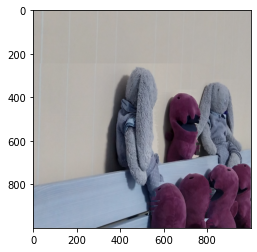

In [3]:
plt.imshow(res)